# Homework #1 Solutions
### Portfolio Theory and Risk Management I

## Imports

In [1044]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data

In [1045]:
df_ex = pd.read_excel('data/multi_asset_etf_data.xlsx', sheet_name = 'excess returns')

df_ex = df_ex.set_index('Date')

df_ex.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018505
2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029027,-0.020301,0.023200,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
2009-07-31,0.031311,0.018595,0.110173,0.100442,0.069217,0.008345,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017405,0.007198,0.131503,0.032977,-0.004587,0.036505,0.007978


## 1 HMC's Approach 
1. The HMC framing of the portfolio allocation problem.

#### (a) Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?
#### (b) There are thousands of individual risky assets in which HMC can invest. Explain why MV optimization across 1,000 securities is infeasible.
#### (c) Rather than optimize across all securities directly, HMC runs a two-stage optimization.First, they build asset class portfolios with each one optimized over the securities of the specific asset class. Second, HMC combines the asset-class portfolios into one total optimized portfolio. In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?
#### (d) Should TIPS form a new asset class or be grouped into one of the other 11 classes?

#### Solutions
a) HMC analyzes the real returns of the capital market. This is not identical to the MV
optimization of nominal returns. Switching from nominal to real simply scales the mean
excess return vector, but it changes the covariance matrix in potentially nontrivial ways.
Denote the inflation factor by I. If inflation is a random variable, then in general
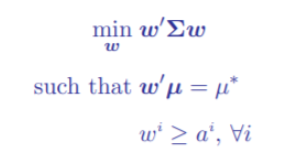
Thus, the calculation of Σ−1µ˜ for the MV portfolio will not be proportional to the nominalreturn case.
Intuitively, this just says that returns may have different hedging properties when inflation
is considered. That’s the whole reason we need a separate asset class for TIPS relative to
nominal treasuries!
HMC is a long-term investor, and over the long-run inflation risk is not trivial. To preserve
the purchasing power of the endowment, the returns should be considered on an inflationadjusted basis.

(b) The MV solution involves inverting the covariance matrix, Σ−1
. For a large number of
securities we will not have enough data to estimate the n(n + 1)/2 elements of Σ with
precision.

(c) An MV optimized portfolio considers all pairwise covariances. The two-stage optimization
does not properly consider diversification between individual securities in different asset
class buckets. This omission matters less if cross asset-class covariances vary little over
individual securities.

(d) In defense of splitting out TIPS into another class, the correlations between TIPS and the
other asset classes are relatively small. The correlations with “domestic bonds” and “high
yield” should be monitored. Furthermore, TIPS securities are highly correlated with each
other.

#### 2. Portfolio constraints.
#### The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.
#### (a) How might we adjust the stated optimization problem in slide 43 of Lecture 1: MeanVariance Allocation to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6. Just consider how we might rewrite the optimization; don’t try to solve this extra-constrained optimization.
#### (b) Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?
#### (c) Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?
#### Solutions:
(a)
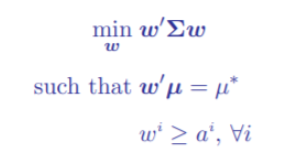
where ai are the minimum holding for each asset class, with most ai = 0.

• The solution is much more complicated due to the inequality constraints, which mean
the problem is no longer convex.

• Though MV is widely used in practice, it is almost always used with these extra weight
constraints.

• The solution is then sensitive to the constraint specification.

2
(b) Under the assumptions of Exhibit 5, an MV optimization would short domestic equities
and domestic bonds in order to get further exposure to the other long positions, TIPS in
particular.
We see that this is happening across the entire range of expected return targets, and it is a
result of the extremely attractive Sharpe Ratio and hedging properties assumed of TIPS.

(c) We see that under the tighter constraints of Exhibit 6, the volatility needed to hit any
expected return target is higher. Accordingly, the Mean/Vol Ratios go from 0.38 to 0.35 in
most cases. Though this is a relatively small decline, it does indicate that the optimization
loses almost 10% of its performance simply due to the increased constraints from Exhibit
5 to Exhibit 6. And an unconstrained solution would get a Mean/Vol Ratio above 0.80.
For expected return targets further from the tangency point, this deterioration gets worse
and worse due to the fact that the MV-efficient portfolios cannot be obtained by taking the
appropriate short positions.

## 2 Mean-Variance Optimization

### 2.1 Summary Statistics

(a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)

In [1046]:
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Vol'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Vol']
    
    return round(ss_df, 4)

In [1047]:
sum_stats = summary_stats(df_ex, 12)
sum_stats

,Mean,Vol,Sharpe
BWX,0.0208,0.0743,0.2802
DBC,0.0101,0.1773,0.0567
EEM,0.0931,0.1962,0.4746
EFA,0.0992,0.1613,0.6152
HYG,0.0812,0.0860,0.9442
IEF,0.0334,0.0569,0.5875
IYR,0.1643,0.1801,0.9124
PSP,0.1702,0.2134,0.7977
QAI,0.0278,0.0478,0.5815
SPY,0.1649,0.1392,1.1850


(b) Which assets have the best and worst Sharpe ratios?

In [1048]:
sum_stats.nlargest(1, 'Sharpe')

,Mean,Vol,Sharpe
SPY,0.1649,0.1392,1.185


In [1049]:
sum_stats.nsmallest(1, 'Sharpe')

,Mean,Vol,Sharpe
DBC,0.0101,0.1773,0.0567


### 2.2 Descriptive Analysis

(a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

In [1050]:
corr_mat = round(df_ex.corr(), 4)

corr_mat

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.0000,0.4376,0.6084,0.5522,0.4800,0.2354,0.3971,0.4560,0.6054,0.3738,0.5268
DBC,0.4376,1.0000,0.6200,0.6346,0.5302,-0.3797,0.3218,0.5752,0.6179,0.5744,0.1376
EEM,0.6084,0.6200,1.0000,0.8540,0.7483,-0.3114,0.6141,0.8044,0.8059,0.7578,0.2212
EFA,0.5522,0.6346,0.8540,1.0000,0.7510,-0.3790,0.6661,0.9082,0.8302,0.8731,0.1387
HYG,0.4800,0.5302,0.7483,0.7510,1.0000,-0.2372,0.7575,0.8201,0.7454,0.7460,0.2080
IEF,0.2354,-0.3797,-0.3114,-0.3790,-0.2372,1.0000,-0.0791,-0.4043,-0.1614,-0.4200,0.6490
IYR,0.3971,0.3218,0.6141,0.6661,0.7575,-0.0791,1.0000,0.7343,0.6013,0.7161,0.2835
PSP,0.4560,0.5752,0.8044,0.9082,0.8201,-0.4043,0.7343,1.0000,0.8106,0.8942,0.1355
QAI,0.6054,0.6179,0.8059,0.8302,0.7454,-0.1614,0.6013,0.8106,1.0000,0.8201,0.3375
SPY,0.3738,0.5744,0.7578,0.8731,0.7460,-0.4200,0.7161,0.8942,0.8201,1.0000,0.1033


In [1051]:
### Make the diagonals NaN so we can find the highest and lowest pairwise correlations
corr_mat[corr_mat == 1] = None

corr_rank = corr_mat.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')

corr_mat

MIN Correlation pair is ('SPY', 'IEF')
MAX Correlation pair is ('PSP', 'EFA')


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,NaN,0.4376,0.6084,0.5522,0.4800,0.2354,0.3971,0.4560,0.6054,0.3738,0.5268
DBC,0.4376,NaN,0.6200,0.6346,0.5302,-0.3797,0.3218,0.5752,0.6179,0.5744,0.1376
EEM,0.6084,0.6200,NaN,0.8540,0.7483,-0.3114,0.6141,0.8044,0.8059,0.7578,0.2212
EFA,0.5522,0.6346,0.8540,NaN,0.7510,-0.3790,0.6661,0.9082,0.8302,0.8731,0.1387
HYG,0.4800,0.5302,0.7483,0.7510,NaN,-0.2372,0.7575,0.8201,0.7454,0.7460,0.2080
IEF,0.2354,-0.3797,-0.3114,-0.3790,-0.2372,NaN,-0.0791,-0.4043,-0.1614,-0.4200,0.6490
IYR,0.3971,0.3218,0.6141,0.6661,0.7575,-0.0791,NaN,0.7343,0.6013,0.7161,0.2835
PSP,0.4560,0.5752,0.8044,0.9082,0.8201,-0.4043,0.7343,NaN,0.8106,0.8942,0.1355
QAI,0.6054,0.6179,0.8059,0.8302,0.7454,-0.1614,0.6013,0.8106,NaN,0.8201,0.3375
SPY,0.3738,0.5744,0.7578,0.8731,0.7460,-0.4200,0.7161,0.8942,0.8201,NaN,0.1033


(b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign
bonds?

In [1052]:
sum_stats.loc[['TIP', 'IEF', 'BWX']]

,Mean,Vol,Sharpe
TIP,0.0372,0.0452,0.8248
IEF,0.0334,0.0569,0.5875
BWX,0.0208,0.0743,0.2802


TIPS has outperformed domestic and foreign bonds in both mean and vol, leading to a better Sharpe ratio.

(c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that
Harvard should consider them as a separate asset?

**Yes, TIPS is not very highly correlated to any of the other asset classes. The correlations with BWX and IEF should be monitored though.**

### 2.3 The MV Frontier

(a) Compute and display the weights of the tangency portfolios: $\omega^{tan}$.

In [1053]:
def compute_tangency(df_tilde, diagonalize_Sigma=False):

    """Compute tangency portfolio given a set of excess returns.
    

    Also, for convenience, this returns the associated vector of average

    returns and the variance-covariance matrix.


    Parameters

    ----------

    diagonalize_Sigma: bool

        When `True`, set the off diagonal elements of the variance-covariance

        matrix to zero.

    """

    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))



    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.

    omega_tangency = pd.Series(weights, index=mu_tilde.index)

    return omega_tangency, mu_tilde, Sigma_adj



omega_tangency, mu_tilde, Sigma = compute_tangency(df_ex)

omega_tangency.to_frame('Tangency Weights')

,Tangency Weights
BWX,-0.259236
DBC,-0.049786
EEM,0.068120
EFA,-0.157671
HYG,0.775635
IEF,1.734962
IYR,-0.366667
PSP,-0.000685
QAI,-2.477194
SPY,1.540749


(b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to $\omega^{tan}$.

In [1054]:
def portfolio_stats(omega, mu_tilde, Sigma, annualize_fac):
    # Mean
    mean = (mu_tilde @ omega) * annualize_fac

    # Volatility
    vol = np.sqrt(omega @ Sigma @ omega) * np.sqrt(annualize_fac)


    # Sharpe ratio
    sharpe_ratio = mean / vol

    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
                              index = ['Mean', 'Volatility', 'Sharpe'], 
                              columns = ['Portfolio Stats']), 4)

tangency_stats(omega_tangency, mu_tilde, Sigma, 12)

,Tangency Portfolio
Mean,0.2378
Volatility,0.1048
Sharpe,2.2687


### 2.4 The allocation.

(a) Compute and display the weights of MV portfolios with target returns of $\tilde{\mu}^{p}$ = .01.

In [1055]:
def target_mv_portfolio(df_tilde, target_return=0.01, diagonalize_Sigma=False):

    """Compute MV optimal portfolio, given target return and set of excess returns.

    Parameters

    ----------

    diagonalize_Sigma: bool

        When `True`, set the off diagonal elements of the variance-covariance

        matrix to zero.

    """

    omega_tangency, mu_tilde, Sigma = compute_tangency(df_tilde, diagonalize_Sigma=diagonalize_Sigma)

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    Sigma_inv = np.linalg.inv(Sigma_adj)

    N = Sigma_adj.shape[0]

    delta_tilde = ((np.ones(N) @ Sigma_inv @ mu_tilde)/(mu_tilde @ Sigma_inv @ mu_tilde)) * target_return

    omega_star = delta_tilde * omega_tangency

    return omega_star, mu_tilde, Sigma_adj

omega_star, mu_tilde, Sigma = target_mv_portfolio(df_ex)

omega_star_df = omega_star.to_frame('MV Portfolio Weights')

omega_star_df

,MV Portfolio Weights
BWX,-0.130835
DBC,-0.025127
EEM,0.034380
EFA,-0.079576
HYG,0.391459
IEF,0.875628
IYR,-0.185055
PSP,-0.000346
QAI,-1.250228
SPY,0.777609


(b) What is the mean, volatility, and Sharpe ratio for $\omega^{p}$?

In [1056]:
portfolio_stats(omega_star, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.1200
Volatility,0.0529
Sharpe,2.2687


(c) Discuss the allocation. In which assets is the portfolio most long? And short?

In [1057]:
omega_star_df.sort_values(omega_star_df.columns[0], ascending = False)

,MV Portfolio Weights
IEF,0.875628
SPY,0.777609
HYG,0.391459
TIP,0.096787
EEM,0.034380
PSP,-0.000346
DBC,-0.025127
EFA,-0.079576
BWX,-0.130835
IYR,-0.185055


The portfolio is most long IEF and most short QAI. It has a large short position in QAI, and various other short positions, but these are much less aggressive. The portfolio also has a large long position in SPY. 

(d) Does this line up with which assets have the strongest Sharpe ratios?

In [1058]:
sum_stats.sort_values('Sharpe', ascending = False)

,Mean,Vol,Sharpe
SPY,0.1649,0.1392,1.1850
HYG,0.0812,0.0860,0.9442
IYR,0.1643,0.1801,0.9124
TIP,0.0372,0.0452,0.8248
PSP,0.1702,0.2134,0.7977
EFA,0.0992,0.1613,0.6152
IEF,0.0334,0.0569,0.5875
QAI,0.0278,0.0478,0.5815
EEM,0.0931,0.1962,0.4746
BWX,0.0208,0.0743,0.2802


No, IEF and QAI have almost identical Sharpe ratios. 

### 2.5 Simple Portfolios

(a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the
entire weighting vector to have target mean $\tilde{w}$ = .01. Report its mean, volatility, and Sharpe ratio.

In [1059]:
### Equal weights

# Set up matrix of the same shape as the tangency weights vector
equal_weights = np.ones(len(omega_tangency))
# Replace values with what the equal weights should be
target_mean = 0.01
equal_weights[equal_weights == 1] = (1/len(omega_tangency))

equal_weights = equal_weights * (target_mean / (df_ex.mean() @ equal_weights))
portfolio_stats(equal_weights, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.1200
Volatility,0.1436
Sharpe,0.8359


(b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample volatility estimate.

> $w^{i} = \dfrac{1}{\sigma_{i}}$

This will give the weight vector, $w$, but you will need to rescale it to have a target mean of $\tilde{\mu}$ = .01.

In [1060]:
w = 1 / (df_ex.std())
target_mean = .01

factor = 1 / ((w @ df_ex.mean()) / target_mean)

w = factor * w

w.to_frame('Weights')

,Weights
BWX,0.222459
DBC,0.093215
EEM,0.084253
EFA,0.102465
HYG,0.192230
IEF,0.290530
IYR,0.091787
PSP,0.077454
QAI,0.345809
SPY,0.118776


In [1061]:
portfolio_stats(w, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.1200
Volatility,0.1284
Sharpe,0.9349


(c) How does these compare to the MV portfolio from problem 2.4?


Sharpe is much lower, but the weights are not as extreme and there are no short positions, whereas in the MV portfolio there are multiple short positions and one is very large. It is possible that the MV portfolio may perform much worse out of sample. 

### 2.6 Out-of-Sample Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of
sample.

(a) Using only data through the end of 2020, compute $w^{p}$ for $\tilde{\mu}$ = .01, allocating to all 11 assets.

In [1062]:
df_ex_2020 = df_ex.loc[:'2020']

omega_p, mu_tilde_p, Sigma_p = target_mv_portfolio(df_ex_2020, target_return=0.01, diagonalize_Sigma=False)

omega_p.to_frame('MV Weights')

,MV Weights
BWX,-0.039015
DBC,-0.070831
EEM,0.027148
EFA,-0.076195
HYG,0.461413
IEF,0.844823
IYR,-0.209008
PSP,-0.024835
QAI,-1.197772
SPY,0.785429


(b) Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the
end of 2020.

In [1063]:
omega_t2020, mu_tilde2020, Sigma2020 = compute_tangency(df_ex_2020)

portfolio_stats(omega_p, mu_tilde2020, Sigma2020, 12)

,Portfolio Stats
Mean,0.1200
Volatility,0.0524
Sharpe,2.2899


(c) Again using those weights, (derived using data through 2020) calculate the portfolio’s
Sharpe ratio based on performance in 2021.

In [1064]:
df_ex_2021 = df_ex.loc['2021':]

omega_t2021, mu_tilde2021, Sigma2021 = compute_tangency(df_ex_2021)

portfolio_stats(omega_p, mu_tilde2021, Sigma2021, 12)

,Portfolio Stats
Mean,0.0999
Volatility,0.0662
Sharpe,1.5097


## 3 Extensions

### 3.1 
Re-do the analysis for total returns. (That is, do not use excess returns.) You will need to drop the column with the risk-free rate, (SHV), to again have our 11 assets.
> Note that Mean/Vol is used as our return/risk metric as we use total returns

In [1065]:
df_tot = pd.read_excel('data/multi_asset_etf_data.xlsx', sheet_name = 'total returns')

df_tot = df_tot.set_index('Date').drop(columns = ['SHV'])

df_tot.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008993,-0.001000,0.155582,0.115190,0.138459,-0.027452,0.296151,0.230202,0.022882,0.099346,-0.017951
2009-05-31,0.053672,0.162663,0.159400,0.131918,0.028555,-0.020773,0.022728,0.053892,0.027865,0.058453,0.019966
2009-06-30,0.005149,-0.026259,-0.022495,-0.014049,0.033518,-0.005572,-0.024863,0.045449,-0.003436,-0.000655,0.001981
2009-07-31,0.031284,0.018568,0.110146,0.100415,0.069190,0.008318,0.105799,0.143247,0.015326,0.074606,0.000879
2009-08-31,0.007628,-0.040365,-0.013136,0.045030,-0.016969,0.007634,0.131939,0.033413,-0.004151,0.036940,0.008414


3.1.1 Summary Statistics

(a)

In [1066]:
sum_stats_tot = summary_stats(df_tot, 12)

sum_stats_tot = sum_stats_tot.rename(columns = {'Sharpe':'Mean/Vol'})

sum_stats_tot.sort_values('Mean/Vol')

,Mean,Vol,Mean/Vol
DBC,0.0151,0.1769,0.0853
BWX,0.0259,0.0744,0.3477
EEM,0.0981,0.1958,0.5012
EFA,0.1043,0.1607,0.6488
IEF,0.0385,0.0575,0.6685
QAI,0.0328,0.0473,0.6946
PSP,0.1753,0.2127,0.8241
TIP,0.0423,0.0452,0.9362
IYR,0.1694,0.1796,0.9429
HYG,0.0862,0.0855,1.0091


(b) SPY has the highest mean/vol ratio and DBC has the lowest.

3.1.2 Descriptive Analysis

(a)

In [1067]:
corr_matrix = round(df_tot.corr(), 4)

### Make the diagonals NaN so we can find the highest and lowest pairwise correlations
corr_matrix[corr_matrix == 1] = None

corr_mat_rank = corr_matrix.unstack().sort_values().dropna()
pair_max_ = corr_mat_rank.index[-1]
pair_min_ = corr_mat_rank.index[0]

print(f'MIN Correlation pair is {pair_min_}')
print(f'MAX Correlation pair is {pair_max_}')

corr_matrix[corr_matrix.isna()] = 1

corr_matrix

MIN Correlation pair is ('SPY', 'IEF')
MAX Correlation pair is ('PSP', 'EFA')


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.0000,0.4325,0.6041,0.5463,0.4763,0.2425,0.3918,0.4479,0.6061,0.3669,0.5281
DBC,0.4325,1.0000,0.6183,0.6324,0.5265,-0.3808,0.3183,0.5725,0.6136,0.5715,0.1278
EEM,0.6041,0.6183,1.0000,0.8534,0.7472,-0.3120,0.6124,0.8032,0.8055,0.7567,0.2130
EFA,0.5463,0.6324,0.8534,1.0000,0.7483,-0.3822,0.6640,0.9074,0.8269,0.8721,0.1265
HYG,0.4763,0.5265,0.7472,0.7483,1.0000,-0.2377,0.7557,0.8171,0.7409,0.7426,0.1977
IEF,0.2425,-0.3808,-0.3120,-0.3822,-0.2377,1.0000,-0.0831,-0.4104,-0.1569,-0.4242,0.6560
IYR,0.3918,0.3183,0.6124,0.6640,0.7557,-0.0831,1.0000,0.7326,0.5966,0.7143,0.2737
PSP,0.4479,0.5725,0.8032,0.9074,0.8171,-0.4104,0.7326,1.0000,0.8049,0.8932,0.1203
QAI,0.6061,0.6136,0.8055,0.8269,0.7409,-0.1569,0.5966,0.8049,1.0000,0.8153,0.3298
SPY,0.3669,0.5715,0.7567,0.8721,0.7426,-0.4242,0.7143,0.8932,0.8153,1.0000,0.0891


(b)

In [1068]:
sum_stats_tot.loc[['TIP', 'IEF', 'BWX']]

,Mean,Vol,Mean/Vol
TIP,0.0423,0.0452,0.9362
IEF,0.0385,0.0575,0.6685
BWX,0.0259,0.0744,0.3477


(c) Yes, TIPS are not very highly correlated to any of the other assets.

3.1.3 The MV Frontier

(a)

In [1069]:
omega_tangency_tot, mu_tot, Sigma_tot = compute_tangency(df_tot)

omega_tangency_tot.to_frame('Tangency Weights')

,Tangency Weights
BWX,-0.219087
DBC,-0.041139
EEM,0.028145
EFA,-0.112003
HYG,0.633431
IEF,1.335227
IYR,-0.287925
PSP,-0.019269
QAI,-1.691389
SPY,1.172032


(b)

In [1070]:
tan_stats_tot = portfolio_stats(omega_tangency_tot, mu_tot, Sigma_tot, 12)

tan_stats_tot.index = ['Mean','Vol', 'Mean/Vol']

tan_stats_tot

,Portfolio Stats
Mean,0.1908
Vol,0.0821
Mean/Vol,2.3256


3.1.4 The Allocation

(a)

In [1071]:
omega_star_tot, mu_tot, Sigma_tot = target_mv_portfolio(df_tot, target_return = .01)

omega_star_df_tot = omega_star_tot.to_frame('MV Portfolio Weights')

omega_star_df_tot

,MV Portfolio Weights
BWX,-0.137771
DBC,-0.025870
EEM,0.017699
EFA,-0.070432
HYG,0.398327
IEF,0.839645
IYR,-0.181059
PSP,-0.012117
QAI,-1.063614
SPY,0.737021


(b)

In [1072]:
MV_stats_tot = portfolio_stats(omega_star_tot, mu_tot, Sigma_tot, 12)

MV_stats_tot.index = ['Mean','Vol', 'Mean/Vol']

MV_stats_tot

,Portfolio Stats
Mean,0.1200
Vol,0.0516
Mean/Vol,2.3256


(c)

In [1073]:
omega_star_df_tot.sort_values(omega_star_df_tot.columns[0])

,MV Portfolio Weights
QAI,-1.063614
IYR,-0.181059
BWX,-0.137771
EFA,-0.070432
DBC,-0.025870
PSP,-0.012117
EEM,0.017699
TIP,0.127011
HYG,0.398327
SPY,0.737021


Most long IEF, most short QAI.

(d)

In [1074]:
sum_stats_tot.sort_values('Mean/Vol')

,Mean,Vol,Mean/Vol
DBC,0.0151,0.1769,0.0853
BWX,0.0259,0.0744,0.3477
EEM,0.0981,0.1958,0.5012
EFA,0.1043,0.1607,0.6488
IEF,0.0385,0.0575,0.6685
QAI,0.0328,0.0473,0.6946
PSP,0.1753,0.2127,0.8241
TIP,0.0423,0.0452,0.9362
IYR,0.1694,0.1796,0.9429
HYG,0.0862,0.0855,1.0091


No, IEF and QAI have similar risk-return tradeoffs. 

3.1.5 Simple Portfolios

(a)

In [1075]:
### Equal weights

# Set up matrix of the same shape as the tangency weights vector
equal_weights_tot = np.ones(len(omega_star_tot))
# Replace values with what the equal weights should be
target_mean = 0.01
equal_weights_tot[equal_weights_tot == 1] = (1/len(omega_star_tot))

equal_weights_tot = equal_weights_tot * (target_mean / (df_tot.mean() @ equal_weights_tot))
ew_stats_tot = portfolio_stats(equal_weights_tot, mu_tot, Sigma_tot, 12)
ew_stats_tot.index = ['Mean','Vol', 'Mean/Vol']

ew_stats_tot

,Portfolio Stats
Mean,0.1200
Vol,0.1345
Mean/Vol,0.8924


(b)

In [1076]:
w_tot = 1 / (df_tot.std())

target_mean = .01

factor_tot = 1 / ((w_tot @ df_tot.mean()) / target_mean)

w_tot = factor_tot * w_tot

w_tot.to_frame('Weights')

,Weights
BWX,0.204583
DBC,0.086043
EEM,0.077722
EFA,0.094675
HYG,0.178071
IEF,0.264491
IYR,0.084728
PSP,0.071545
QAI,0.321895
SPY,0.109875


In [1077]:
rp_stats_tot = portfolio_stats(w_tot, mu_tot, Sigma_tot, 12)

rp_stats_tot.index = ['Mean','Vol', 'Mean/Vol']

rp_stats_tot

,Portfolio Stats
Mean,0.1200
Vol,0.1178
Mean/Vol,1.0188


(c) Sharpe will be lower but the range of the weights is much tighter than in the MV solution.

3.1.6 Out-of-Sample Performance

(a)

In [1078]:
df_tot_2020 = df_tot.loc[:'2020']

omega_p_tot, mu_p_tot, Sigma_p_tot = target_mv_portfolio(df_tot_2020, target_return=0.01, diagonalize_Sigma=False)

omega_p_tot.to_frame('MV Weights')

,MV Weights
BWX,-0.047944
DBC,-0.070452
EEM,0.011329
EFA,-0.066580
HYG,0.464285
IEF,0.805185
IYR,-0.203759
PSP,-0.035485
QAI,-1.009248
SPY,0.740230


(b)

In [1079]:
IS_stats_tot = portfolio_stats(omega_p_tot, mu_p_tot, Sigma_p_tot, 12)

IS_stats_tot.index = ['Mean','Vol', 'Mean/Vol']

IS_stats_tot

,Portfolio Stats
Mean,0.1200
Vol,0.0510
Mean/Vol,2.3546


(c)

In [1080]:
df_tot_2021 = df_tot.loc['2021':]

omega_tot2021, mu_tot2021, Sigma_tot2021 = compute_tangency(df_tot_2021)

OOS_stats_tot = portfolio_stats(omega_p_tot, mu_tot2021, Sigma_tot2021, 12)

OOS_stats_tot.index = ['Mean','Vol', 'Mean/Vol']

OOS_stats_tot

,Portfolio Stats
Mean,0.0919
Vol,0.0637
Mean/Vol,1.4418


### 3.2 Robustness

(a) Reset to the unadjusted data, and 11-asset problem. This time, make one change: in building $\omega^{tan}$, do not use $\Sigma$ as given in the formulas in the lecture. Rather, use a diaganalized $\Sigma^{D}$, which zeroes out all non-diagonal elements of the full covariance matrix, $\Sigma$. How does the allocation look now?

In [1081]:
omega_tan_diag, mu_diag, Sigma_diag = compute_tangency(df_ex, diagonalize_Sigma = True)

omega_tan_diag.to_frame('Weights')

,Weights
BWX,0.047503
DBC,0.004027
EEM,0.030471
EFA,0.048039
HYG,0.138330
IEF,0.130075
IYR,0.063825
PSP,0.047088
QAI,0.153248
SPY,0.107263


(b) What does this suggest about the sensitivity of the solution to estimated means and estimated covariances?

The mean variance solution when we have a full covariance matrix $\Sigma$ is very sensitive to means and covariances. If two securities are quite correlated, the MV solution will take a long position in the security with the higher mean, and a short position in the security with the lower mean. This can result in much more variation in the magnitude of portfolio weights. As can be seen above, with the diagonalized $\Sigma$ the weights are within a much tighter range. 

(c) HMC deals with this sensitivity by using explicit constraints on the allocation vector. Conceptually, what are the pros/cons of doing that versus modifying the formula with $\Sigma^{D}$?

Pros:
- Covariances are actually being taken into account when we diversify, which should lead to a better Sharpe.
- While covariance and correlation can change, correlation between assets is quite sticky. 

Cons:
- Setting constraints may not be optimal as these constraints are arbitrary parameters.  
- With many securities, this problem becomes computationally difficult.
- Covariance and security performance changes, we still have the risk of taking positions based on in sample data that could lead to poor OOS results.  

(d) Re-do the previous problem on Out-of-Sample Performance, but this time using the diagonalized covariance matrix for estimating the weight vector in 2009-2020, and assessing it in 2021.

Using only data through the end of 2020, compute $w^{p}$ for $\tilde{\mu}$ = .01, allocating to all 11 assets.

In [1082]:
df_ex_2020 = df_ex.loc[:'2020']

omega_p_diag, mu_tilde_p_diag, Sigma_p_diag = target_mv_portfolio(df_ex_2020, target_return=0.01, diagonalize_Sigma=True)

omega_p_diag.to_frame('MV Weights')

,MV Weights
BWX,0.104162
DBC,-0.009375
EEM,0.053974
EFA,0.077166
HYG,0.236459
IEF,0.250386
IYR,0.100570
PSP,0.074658
QAI,0.264000
SPY,0.173203


Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the end of 2020.

In [1083]:
portfolio_stats(omega_p_diag, mu_tilde_p_diag, Sigma_p_diag, 12)

,Portfolio Stats
Mean,0.1200
Volatility,0.0516
Sharpe,2.3252


Again using those weights, (derived using data through 2020,) calculate the portfolio’s Sharpe ratio based on performance in 2021.

In [1084]:
df_ex_2021 = df_ex.loc['2021']

_, mu_tilde_p_diag2021, Sigma_p_diag2021 = target_mv_portfolio(df_ex_2021, target_return=0.01, diagonalize_Sigma=False)

portfolio_stats(omega_p_diag, mu_tilde_p_diag2021, Sigma_p_diag2021, 12)

,Portfolio Stats
Mean,0.1538
Volatility,0.0488
Sharpe,3.1497


### 3.3 
Check the OOS performance every year, not just the final year. Do this for the portfolios we have looked at.

In [1085]:
def MV_dynamic(strat, no_tips = True, target_mean = .01, start_year = 2014, end_year = 2020, diagonal_param = False):

    df_ex_noTIPS = df_ex.drop(columns = ['TIP'])
    
    if strat == 'Diagonalized':
        diagonal = True
    else:
        diagonal = diagonal_param
    
    if no_tips == True:
        df = pd.DataFrame(data = None, columns = [strat + ' Mean',strat + ' Vol',strat + ' Sharpe'])
    else:
        df = pd.DataFrame(data = None, columns = [strat + ' TIPS Mean',strat + ' TIPS Vol',strat + ' TIPS Sharpe',
                                              strat + ' No TIPS Mean',strat + ' No TIPS Vol',strat + ' No TIPS Sharpe'])

    curr_year = start_year

    while curr_year <= end_year:
        OOS_year = curr_year + 1
        curr_df = df_ex.loc[:str(curr_year)]
        curr_df_noTIPS = df_ex_noTIPS.loc[:str(curr_year)]
        OOS_df = df_ex.loc[str(OOS_year)]
        OOS_df_noTIPS = df_ex_noTIPS.loc[str(OOS_year)]

        omega_t,  mu_t, _ = compute_tangency(curr_df, diagonalize_Sigma = diagonal)

        _, mu_t_OOS, Sigma_t_OOS = compute_tangency(OOS_df, diagonalize_Sigma = False)

        omega_noT, mu_noT, _ = compute_tangency(curr_df_noTIPS, diagonalize_Sigma = diagonal)

        _, mu_noT_OOS, Sigma_noT_OOS = compute_tangency(OOS_df_noTIPS, diagonalize_Sigma = False)
        
        if strat == 'Equal Weights':
            equal_weights = np.ones(len(omega_t))
            equal_weights[equal_weights_tot == 1] = (1/len(omega_t))
            omega_t = equal_weights * (target_mean / (mu_t @ equal_weights))
            
            if no_tips == False:
                equal_weights = np.ones(len(omega_noT))
                equal_weights[equal_weights == 1] = (1/len(omega_noT))
                omega_noT = equal_weights * (target_mean / (mu_noT @ equal_weights))
            
        if strat == 'Risk Parity':
            omega_t = 1/curr_df.std()
            omega_noT = 1/curr_df_noTIPS.std()
        
        factor_t = 1 / ((omega_t @ mu_t / target_mean))

        omega_t = factor_t * omega_t
                        
        factor_noT = 1 / ((omega_noT @ mu_noT / target_mean))

        omega_noT = factor_noT * omega_noT
        
        if no_tips == True:
            df.loc[OOS_year] = list(portfolio_stats(omega_t, mu_t_OOS, Sigma_t_OOS, 12)['Portfolio Stats'].values)
        else:
            df.loc[OOS_year] = (list(portfolio_stats(omega_t, mu_t_OOS, Sigma_t_OOS, 12)['Portfolio Stats'].values)
            + list(portfolio_stats(omega_noT, mu_noT_OOS, Sigma_noT_OOS, 12)['Portfolio Stats'].values))

        curr_year += 1

    if no_tips == False:
        df[r'$\Delta Sharpe$'] = df[df.columns[2]] - df[df.columns[5]]
    
    return df

In [1086]:
MV_dynamic('Mean Variance')

,Mean Variance Mean,Mean Variance Vol,Mean Variance Sharpe
2015,0.0523,0.0698,0.7496
2016,0.0982,0.0278,3.5299
2017,0.0688,0.0258,2.6616
2018,0.0225,0.0604,0.3720
2019,0.1670,0.0637,2.6200
2020,0.1916,0.0980,1.9545
2021,0.0999,0.0662,1.5097


In [1087]:
MV_dynamic('Diagonalized')

,Diagonalized Mean,Diagonalized Vol,Diagonalized Sharpe
2015,-0.0194,0.0637,-0.3036
2016,0.0724,0.0747,0.9695
2017,0.1240,0.0218,5.6894
2018,-0.0784,0.0800,-0.9797
2019,0.2102,0.0846,2.4848
2020,0.1450,0.2108,0.6880
2021,0.1538,0.0488,3.1497


In [1088]:
MV_dynamic('Equal Weights')

,Equal Weights Mean,Equal Weights Vol,Equal Weights Sharpe
2015,-0.0538,0.0767,-0.7016
2016,0.1000,0.1049,0.9533
2017,0.1696,0.0279,6.0801
2018,-0.1095,0.0973,-1.1257
2019,0.2380,0.1236,1.9249
2020,0.1341,0.2743,0.4888
2021,0.2336,0.0526,4.4377


In [1089]:
MV_dynamic('Risk Parity')

,Risk Parity Mean,Risk Parity Vol,Risk Parity Sharpe
2015,-0.0525,0.0687,-0.7639
2016,0.0947,0.1031,0.9185
2017,0.1579,0.0300,5.2561
2018,-0.1040,0.0862,-1.2072
2019,0.2359,0.1055,2.2363
2020,0.1698,0.2455,0.6916
2021,0.1755,0.0576,3.0439


Performance of the Mean Variance portfolio is much more consistent, Sharpe is positive every year. 

### 3.4 
Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and
just have a 10-asset problem.) See how much it decreases the performance statistics in 2.4. And
how much worse is the performance in 3.3?

In [1090]:
df_ex_noTIPS = df_ex.drop(columns = ['TIP'])

omega_star_noTIPS, mu_tilde_noTIPS, Sigma_noTIPS = target_mv_portfolio(df_ex_noTIPS)

omega_star_noTIPS_df = omega_star_noTIPS.to_frame('MV Portfolio Weights')

omega_star_noTIPS_df

,MV Portfolio Weights
BWX,-0.127104
DBC,-0.019172
EEM,0.038944
EFA,-0.087454
HYG,0.386245
IEF,0.940706
IYR,-0.183660
PSP,0.005517
QAI,-1.243255
SPY,0.781556


In [1091]:
portfolio_stats(omega_star_noTIPS, mu_tilde_noTIPS, Sigma_noTIPS, 12)

,Portfolio Stats
Mean,0.1200
Volatility,0.0529
Sharpe,2.2663


Sharpe decreases very slightly.

In [1092]:
MV_dynamic('Mean Variance', no_tips = False)

,Mean Variance TIPS Mean,Mean Variance TIPS Vol,Mean Variance TIPS Sharpe,Mean Variance No TIPS Mean,Mean Variance No TIPS Vol,Mean Variance No TIPS Sharpe,$\Delta Sharpe$
2015,0.0523,0.0698,0.7496,0.0498,0.0659,0.7558,-0.0062
2016,0.0982,0.0278,3.5299,0.0935,0.0276,3.3879,0.1420
2017,0.0688,0.0258,2.6616,0.0753,0.0258,2.9232,-0.2616
2018,0.0225,0.0604,0.3720,0.0235,0.0604,0.3899,-0.0179
2019,0.1670,0.0637,2.6200,0.1682,0.0645,2.6084,0.0116
2020,0.1916,0.0980,1.9545,0.1872,0.0944,1.9839,-0.0294
2021,0.0999,0.0662,1.5097,0.0978,0.0657,1.4878,0.0219


In [1093]:
MV_dynamic('Diagonalized', no_tips = False)

,Diagonalized TIPS Mean,Diagonalized TIPS Vol,Diagonalized TIPS Sharpe,Diagonalized No TIPS Mean,Diagonalized No TIPS Vol,Diagonalized No TIPS Sharpe,$\Delta Sharpe$
2015,-0.0194,0.0637,-0.3036,-0.0171,0.0653,-0.2619,-0.0417
2016,0.0724,0.0747,0.9695,0.0667,0.0751,0.8883,0.0812
2017,0.1240,0.0218,5.6894,0.1282,0.0211,6.0752,-0.3858
2018,-0.0784,0.0800,-0.9797,-0.0759,0.0837,-0.9066,-0.0731
2019,0.2102,0.0846,2.4848,0.2069,0.0903,2.2908,0.1940
2020,0.1450,0.2108,0.6880,0.1256,0.2150,0.5840,0.1040
2021,0.1538,0.0488,3.1497,0.1452,0.0424,3.4294,-0.2797


In [1094]:
MV_dynamic('Equal Weights', no_tips = False)

,Equal Weights TIPS Mean,Equal Weights TIPS Vol,Equal Weights TIPS Sharpe,Equal Weights No TIPS Mean,Equal Weights No TIPS Vol,Equal Weights No TIPS Sharpe,$\Delta Sharpe$
2015,-0.0538,0.0767,-0.7016,-0.0541,0.0783,-0.6903,-0.0113
2016,0.1000,0.1049,0.9533,0.0982,0.1068,0.9195,0.0338
2017,0.1696,0.0279,6.0801,0.1733,0.0278,6.2314,-0.1513
2018,-0.1095,0.0973,-1.1257,-0.1095,0.0999,-1.0965,-0.0292
2019,0.2380,0.1236,1.9249,0.2374,0.1287,1.8442,0.0807
2020,0.1341,0.2743,0.4888,0.1249,0.2790,0.4477,0.0411
2021,0.2336,0.0526,4.4377,0.2342,0.0536,4.3711,0.0666


In [1095]:
MV_dynamic('Risk Parity', no_tips = False)

,Risk Parity TIPS Mean,Risk Parity TIPS Vol,Risk Parity TIPS Sharpe,Risk Parity No TIPS Mean,Risk Parity No TIPS Vol,Risk Parity No TIPS Sharpe,$\Delta Sharpe$
2015,-0.0525,0.0687,-0.7639,-0.0530,0.0713,-0.7439,-0.0200
2016,0.0947,0.1031,0.9185,0.0891,0.1047,0.8509,0.0676
2017,0.1579,0.0300,5.2561,0.1669,0.0288,5.7903,-0.5342
2018,-0.1040,0.0862,-1.2072,-0.1034,0.0912,-1.1337,-0.0735
2019,0.2359,0.1055,2.2363,0.2340,0.1152,2.0315,0.2048
2020,0.1698,0.2455,0.6916,0.1476,0.2550,0.5789,0.1127
2021,0.1755,0.0576,3.0439,0.1698,0.0536,3.1680,-0.1241


Out-of-Sample performance is also quite similar when we drop TIPS. 